In [1]:
import utility as util

In [2]:
df=util.readCSV2df("results-survey.csv")

In [3]:
print("No of entries in the survey: ",len(df))

No of entries in the survey:  49


In [4]:
df.head()

,What is your profession ?,How many years you are associated with software development for?,"Have you ever used any third party API in your software development projects? e.g. Google Map API, Twitter Ads API etc.",Please name some of the API's providers you've worked with. [Google Maps API],Please name some of the API's providers you've worked with. [Twitter API],Please name some of the API's providers you've worked with. [WinApi],Please name some of the API's providers you've worked with. [Facebook Graph API],"Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Very simple to use]","Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Good documentation]","Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Quality of APIs are good]",...,"Please rate your experience of WinAPI APIs. 1 stand for very good experience, 5 stands for worst experience. [Highly secured]","Please rate your experience of WinAPI APIs. 1 stand for very good experience, 5 stands for worst experience. [Please rate your overall satisfaction]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Very simple to use]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Good documentation]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Quality of APIs are good]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Return meaningful response]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Free and unlimited access]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Compatible to the previous version]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Highly secured]","Please rate your experience of Facebook Graph APIs. 1 stand for very good experience, 5 stands for worst experience. [Please rate your overall satisfaction]"
0,Software developer,1.0,Yes,Yes,No,No,No,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,5.0,Yes,Yes,Yes,No,No,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Student,2.0,Yes,Yes,Yes,No,Yes,3.0,4.0,3.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Total no of questions/columns: ",len(df.columns.values))

Total no of questions/columns:  39


In [6]:
old_columns=df.columns.values
old_columns=list(old_columns)
old_columns

['What is your profession ?',
 'How many years you are associated with software development for?',
 'Have you ever used any third party API in your software development projects? e.g. Google Map API, Twitter Ads API etc.',
 "Please name some of the API's providers you've worked with. [Google Maps API]",
 "Please name some of the API's providers you've worked with. [Twitter API]",
 "Please name some of the API's providers you've worked with. [WinApi]",
 "Please name some of the API's providers you've worked with. [Facebook Graph API]",
 'Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Very simple to use]',
 'Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Good documentation]',
 'Please rate your experience of Google Maps APIs. 1 stand for very good experience, 5 stands for worst experience. [Quality of APIs are good]',
 'Please rate your experience of Goo

In [7]:
df.columns=range(39)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,Software developer,1.0,Yes,Yes,No,No,No,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Student,5.0,Yes,Yes,Yes,No,No,1.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Student,2.0,Yes,Yes,Yes,No,Yes,3.0,4.0,3.0,...,NaN,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from collections import Counter
import math
prof=df[0].apply(lambda x: x.lower().strip() if isinstance(x,str) else str(x))
distict_prof_key=list(Counter(prof).keys())
distinct_val=list(Counter(prof).values())
distinct_prof={}
for indx,key in enumerate(distict_prof_key):
    distinct_prof[key]=distinct_val[indx]

In [9]:
distinct_prof['software developer']+=distinct_prof['software professional']+distinct_prof['software engineer']+distinct_prof['sw eng']+distinct_prof['software development engineer']
distinct_prof.pop('software professional', None)
distinct_prof.pop('software engineer', None)
distinct_prof.pop('sw eng', None)
distinct_prof.pop('software development engineer', None)
distinct_prof

{'software developer': 9,
 'student': 12,
 'nan': 21,
 'student - data scientist': 1,
 'it professional': 1,
 'data engineer': 1,
 'working student software developer': 1,
 'azure cloud architect': 1,
 'ui/ux designer': 1,
 'operations': 1}

In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_value_labels(axis):
    rects = axis.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        label = '{:.2f}'.format(y_value)

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Create annotation
        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

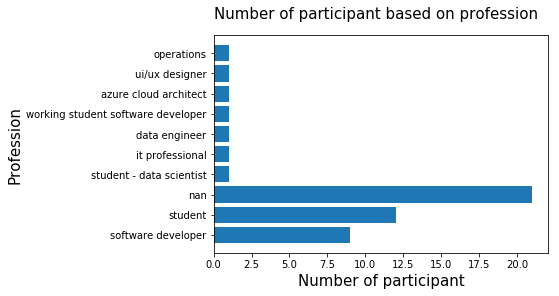

In [12]:
plt.barh(list(distinct_prof.keys()), list(distinct_prof.values()), align='center')
plt.yticks(range(len(distinct_prof)), list(distinct_prof.keys()))
#plt.xticks(rotation=90)
plt.ylabel("Profession",fontsize=15)
plt.xlabel("Number of participant",fontsize=15)
#plot_value_labels(plt.gca())
fig = plt.gcf()
fig.suptitle('Number of participant based on profession', fontsize=15)
plt.show()

In [13]:
df[3].unique()

array(['Yes', nan, 'No'], dtype=object)

In [14]:
google_api_col_val=df[3].apply(lambda i: 1 if isinstance(i,str) and i=="Yes" else 0)

In [15]:
import numpy as np
gogle_map_api_used=sum(google_api_col_val)
gogle_map_api_used_percentage=np.mean(google_api_col_val)*100
print("Number of participants who used Google Map API: %d and percentage: %f" %(gogle_map_api_used,gogle_map_api_used_percentage))

Number of participants who used Google Map API: 22 and percentage: 44.897959


In [16]:
df[7].unique()

array([ 5.,  1.,  3., nan,  2.,  4.])

In [17]:
rate_constant={
    5.0:"Bad",
    4.0:"Not Good",
    3.0:"Average",
    2.0:"Good",
    1.0:"Very Good"
}

In [62]:
def plot_pie(sizes,labels,colors,title):
    plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 16})
    plt.axis('equal')
    plt.title(title+'\n',fontsize=16)
    plt.show()

In [19]:
def map_ratings(df_index):
    col_val=list(df[df_index])
    col_val=[a for a in col_val if str(a)!='nan']
    k=list(Counter(col_val).keys())
    v=list(Counter(col_val).values())
    col_val_stat={}
    for indx, val in enumerate(k):
        col_val_stat[rate_constant[val]]=v[indx]
    return col_val_stat

In [63]:
def map_plot_ratings(df_index,colors,title):
    col_val_stat=map_ratings(df_index)
    labels = col_val_stat.keys()
    sizes = col_val_stat.values()
    plot_pie(sizes,labels,colors,title)
    return col_val_stat

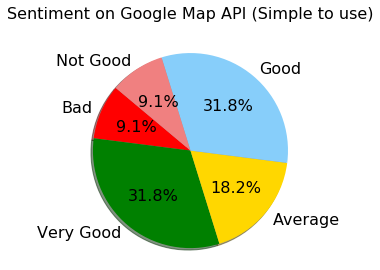

In [64]:
colors = ['red','green', 'gold', 'lightskyblue', 'lightcoral']
title='Sentiment on Google Map API (Simple to use)'
simple_to_use_g_map_api_stat=map_plot_ratings(7,colors,title)

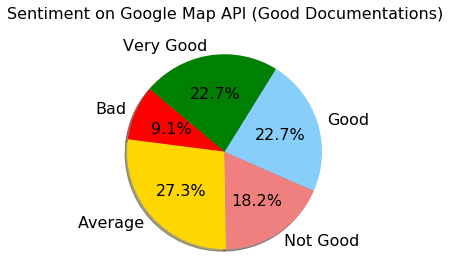

In [65]:
colors = ['red','gold', 'lightcoral', 'lightskyblue', 'green']
title='Sentiment on Google Map API (Good Documentations)'
good_doc_g_map_api_stat=map_plot_ratings(8,colors,title)

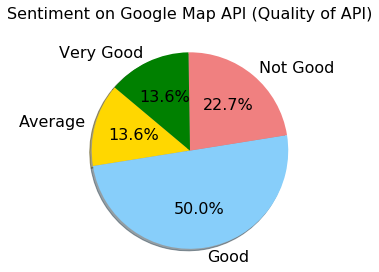

In [67]:
colors = ['gold','lightskyblue', 'lightcoral', 'green', 'red']
title='Sentiment on Google Map API (Quality of API)'
quality_g_map_api_stat=map_plot_ratings(9,colors,title)

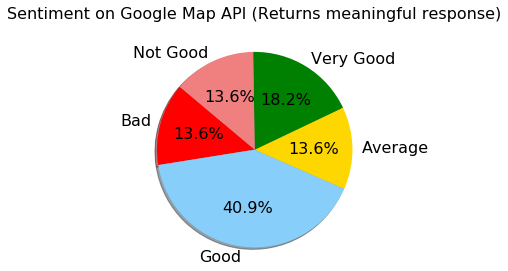

In [68]:
colors = ['red','lightskyblue', 'gold', 'green', 'lightcoral']
title='Sentiment on Google Map API (Returns meaningful response)'
response_g_map_api_stat=map_plot_ratings(10,colors,title)

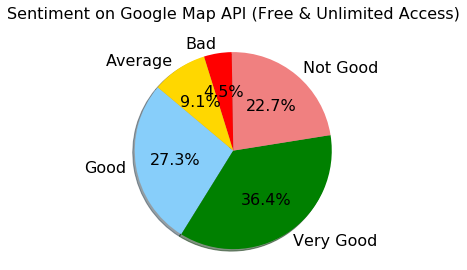

In [69]:
colors = ['lightskyblue','green', 'lightcoral', 'red', 'gold']
title='Sentiment on Google Map API (Free & Unlimited Access)'
free_access_gmap_api_stat=map_plot_ratings(11,colors,title)

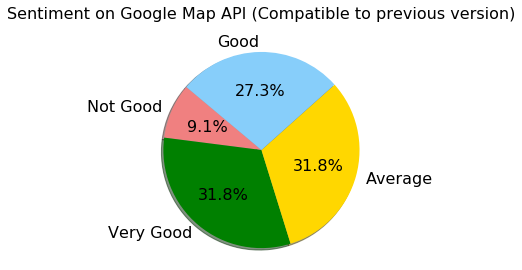

In [71]:
colors = ['lightcoral','green', 'gold', 'lightskyblue', 'red']
title='Sentiment on Google Map API (Compatible to previous version)'
bckward_compat_gmap_api_stat=map_plot_ratings(12,colors,title)

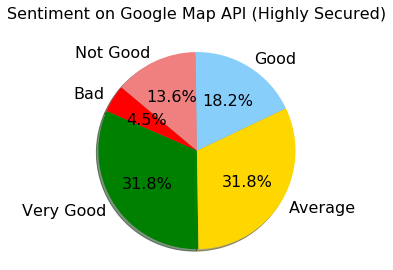

In [73]:
colors = ['red','green', 'gold', 'lightskyblue', 'lightcoral']
title='Sentiment on Google Map API (Highly Secured)'
security_gmap_api_stat=map_plot_ratings(13,colors,title)

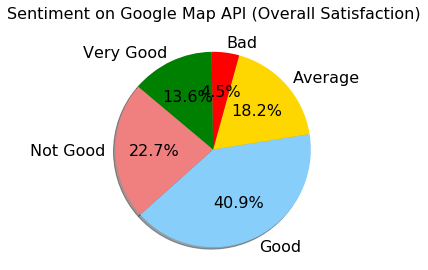

In [75]:
colors = ['lightcoral','lightskyblue', 'gold', 'red', 'green']
title='Sentiment on Google Map API (Overall Satisfaction)'
satisfaction_gmap_api_stat=map_plot_ratings(14,colors,title)